In [ ]:
# bibliotecas utilizadas
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import cv2




In [ ]:
# integra o drive com o colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle # cria um diretório chamado kaggle
!cp ./drive/MyDrive/1.COCADA/kaggle/kaggle.json ~/.kaggle # copia a minha API

In [ ]:
# utiliza a minha API e a API do dataset para realizar download dos dataset utilizado
!kaggle datasets download -d salader/dogs-vs-cats # API do dataset

100% 1.06G/1.06G [00:10<00:00, 85.6MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s] 


In [ ]:
# o arquivo baixada veio zipado, é necessário deszipar, salva temporariamente
# para salvar permanentemente é necessário definir um path para o drive no item (1)
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content') # (1)
zip_ref.close()

In [ ]:
# modelo neural

# Referencia do modelo - https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define o modelo
def define_model():
	# carrega a arquitetura do modelo
	model = VGG16(include_top=False, input_shape=(224, 224, 3))

	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)

	# define new model
	model = Model(inputs=model.inputs, outputs=output)

	# compila o modelo
	opt = SGD(lr=0.001, momentum=0.9) # lr = gradiente descendente
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()

	# cria pré-processamento de imagens durante o treinamento de modelos de aprendizado profundo.
	datagen = ImageDataGenerator(featurewise_center=True)

	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]

	# prepare iterator
	train_it = datagen.flow_from_directory('train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))

	# fit model
	model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)

	# salva o modelo na paste reservada ao projeto
	model.save('./drive/MyDrive/1.COCADA/final_model1.h5') # devemos ter cuidado ao executar esse célula pois ela pode sobrescrever o modelo salvo anteriormente
	# para evitar erros, estou salvando com nome final_model1, mas é exatamente o memso modelo que final_model

# executa o modelo
run_test_harness()

58889256/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Found 20000 images belonging to 2 classes.


<ipython-input-8-c64c010a15f3>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)


In [ ]:
# carrega a partir do modelo previamente calculado
model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')


In [ ]:
# (fins de teste) exibe o conteudo da pasta reservada ao projeto
!ls ./drive/MyDrive/1.COCADA/

best_model.h5	final_model.h5	local_model.h5	      predictions  train
colab_model.h5	kaggle		other_local_model.h5  test


In [ ]:
# fazendo previsão dos cachorros
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
def load_image(filename):
	# carrega a imagem
	img = load_img(filename, target_size=(224, 224))

  # converte a imagem para array
	img = img_to_array(img)

  # redimensiona a imagem numa única imagem com 3 canais
	img = img.reshape(1, 224, 224, 3)

  # normalização dos dados
	img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
	img = img - [123.68, 116.779, 103.939]
	return img



# carrega a imagem e faz a previsão da classe (cão ou gato)
def run_example():
    lista = [1,2,3,4,5,6,7,8]
    erros = 0
    final = len(lista)

    # carrega o modelo da pasta reservada ao projeto
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):

        # carrega a imagem
        img = load_image(f'./drive/MyDrive/1.COCADA/predictions/dogs/dog{lista[i]}.jpg')

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)


        # result[0] == 0 é gato, result[0] == 1 é cachorro
        if result[0] == 0: # se o modelo diz que é gato analisando imagem de cachorro a quantidade de erros tem que aumentar
            erros = erros + 1

    print(f"Das {final} tentativas, o modelo errou {erros}")

# executa o exemplo
run_example()


1/1 [==============================] - 1s 649ms/step
Das 8 tentativas, o modelo errou 0


Os códigos abaixo são muito parecidos, servem para exemplificar o progresso e as modificações feitas até chegar no modelo/plot final


1/1 [==============================] - 1s 548ms/step


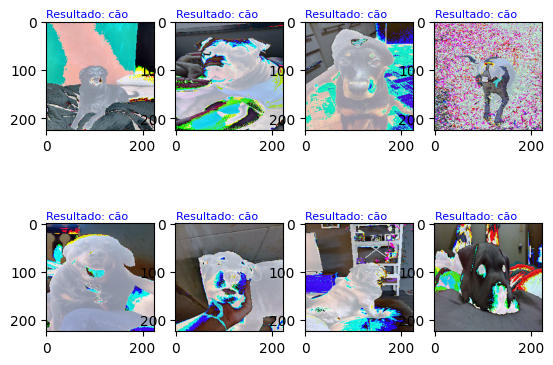

In [ ]:
# Plota os cães e exibe os resultados

from matplotlib import pyplot
from matplotlib.image import imread
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
def load_image(filename):
	  # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32')  # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img

# função responsável por plotar os cachorros
def plot_dogs():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]
    folder_path = './drive/MyDrive/1.COCADA/predictions/dogs/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define nome do arquivo
        filename = folder_path + 'dog' + str(lista[i]) + '.jpg'

        # carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # redimensiona a imagem para o plot
        img = img.reshape(224, 224, 3)
        pyplot.imshow(img.astype('uint8'))

        # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] == 0:
          label = "gato"
        elif result[0] == 1:
          label = "cão"

        # adiciona a legenda no plot
        # os parametros tem relação com a posição da legenda e a cor
        pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)

    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_dogs()


O código abaixo é bem similar ao anterior, estou apenas fazendo testes para exibir a imagem com pouca distorção

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 577ms/step


1/1 [==============================] - 1s 601ms/step


1/1 [==============================] - 1s 564ms/step


1/1 [==============================] - 1s 564ms/step


1/1 [==============================] - 1s 579ms/step


1/1 [==============================] - 1s 551ms/step


1/1 [==============================] - 1s 555ms/step


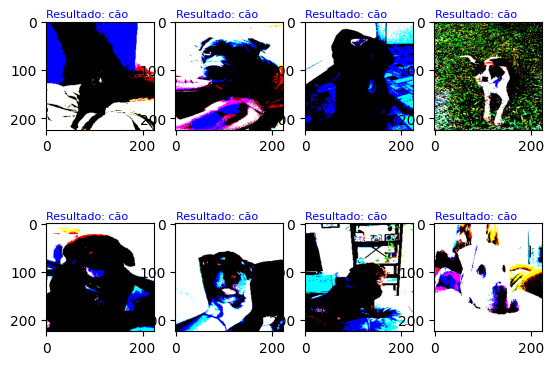

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
def load_image(filename):

	  # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img

# função responsável por plotar os cachorros
def plot_dogs():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]
    folder_path = './drive/MyDrive/1.COCADA/predictions/dogs/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define nome do arquivo
        filename = folder_path + 'dog' + str(lista[i]) + '.jpg'

        # carrega a imagem e prepara-a de acordo as exigencias do nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # redimensiona a imagem para o plot
        img = cv2.resize(img[0], (224, 224)).astype('float32')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # plota a imagem
        pyplot.imshow(img)

        # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] == 0:
          label = "gato"
        elif result[0] == 1:
          label = "cão"

        # adiciona a legenda no plot
        # os parametros tem relação com a posição da legenda e a cor
        pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)

    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_dogs()


O código abaixo é responsável por exibir a imagem com menor distorção

1/1 [==============================] - 1s 543ms/step


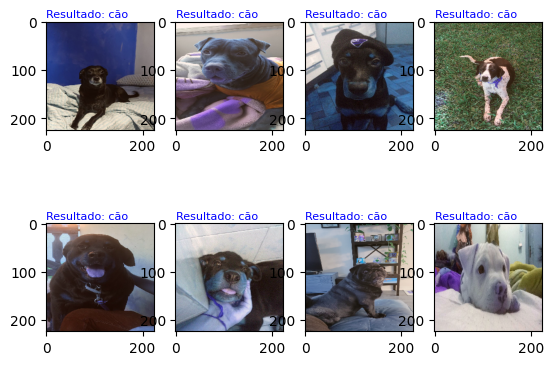

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


def plot_dogs():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]
    folder_path = './drive/MyDrive/1.COCADA/predictions/dogs/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define nome do arquivo
        filename = folder_path + 'dog' + str(lista[i]) + '.jpg'

        # carrega a imagem e prepara-a de acordo as exigencias do nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # converte os valores de cada pixel para o range de [0, 255], apenas para não distorcer a imagem
        img = img[0]
        img = (img - img.min()) * (255.0 / (img.max() - img.min()))
        img = img.astype('uint8')

        # redimensiona e converte para RGB
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # plota a imagem
        pyplot.imshow(img)

        # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        label = "gato" if result[0] == 0 else "cão"

        # adiciona a legenda no plot
        # os parametros tem relação com a posição e a cor da legenda
        pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)

    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_dogs()


In [ ]:
# apenas para fins de teste, exibe o conteudo do path passado como parametro
!ls /content/drive/MyDrive/1.COCADA/predictions/dogs

dog1.jpg  dog2.jpg  dog3.jpg  dog4.jpg	dog5.jpg  dog6.jpg  dog7.jpg  dog8.jpg


# No código abaixo, fomos muito restritivos, ou é gato ou é cachorro. O resultado será 0 (gato) ou 1 (cachorro).

Note que a primeira imagem é bastante parecida com um cachorro, mas na verdade é um gato. Neste caso o modelo previu erroneamente

1/1 [==============================] - 1s 539ms/step


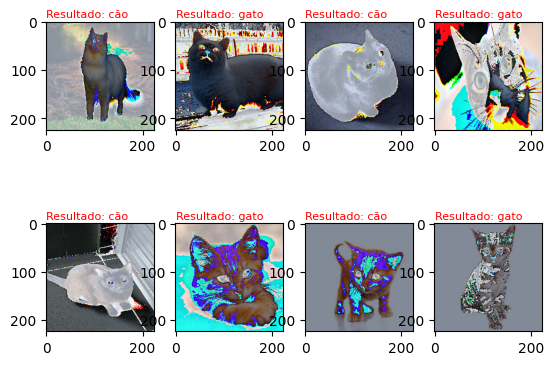

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


# função responsável por plotar os gatos
def plot_cats():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]
    folder_path = './drive/MyDrive/1.COCADA/predictions/cats/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define nome do arquivo
        filename = folder_path + 'cat' + str(lista[i]) + '.jpg'

        # carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # redimensiona a imagem para o plot
        img = img.reshape(224, 224, 3)
        pyplot.imshow(img.astype('uint8'))

        # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] == 0:
          label = "gato"
        else:
          label = "cão"

        # adiciona a legenda no plot
        # os parametros tem relação com a posição da legenda e a cor
        pyplot.text(0, -10, f'Resultado: {label}', color='red', fontsize=8)

    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_cats()


"Afrouxamos" a restrição colocamos: <br>resultado[0] == 0 (gato)<br>resultado[0] == 1 (cão)<br> else: (inconclusivo)
<br>Com isso, verificamos que o gato similar a um cachorro ficou definido como inconclusivo

1/1 [==============================] - 1s 727ms/step
[7.5030606e-05]
1/1 [==============================] - 1s 567ms/step
[0.]
1/1 [==============================] - 1s 563ms/step
[6.1028353e-16]
1/1 [==============================] - 1s 553ms/step
[0.]
1/1 [==============================] - 1s 555ms/step
[3.2297746e-31]
1/1 [==============================] - 1s 567ms/step
[0.]
1/1 [==============================] - 1s 608ms/step
[6.878201e-28]
1/1 [==============================] - 1s 573ms/step
[0.]


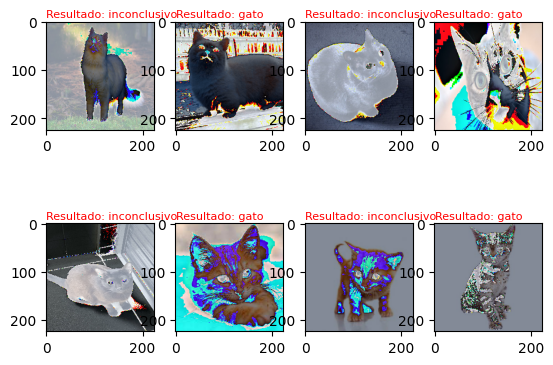

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img



# função responsável por plotar os gatos
def plot_cats():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]
    folder_path = './drive/MyDrive/1.COCADA/predictions/cats/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define nome do arquivo
        filename = folder_path + 'cat' + str(lista[i]) + '.jpg'

        # carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # redimensiona a imagem para o plot
        img = img.reshape(224, 224, 3)
        pyplot.imshow(img.astype('uint8'))

        # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] == 0:
          label = "gato"
        elif result[0] == 1:
          label = "cão"
        else:
          label = "inconclusivo"
        print(result[0])

        # adiciona a legenda no plot
        # os parametros tem relação com a posição da legenda e a cor
        pyplot.text(0, -10, f'Resultado: {label}', color='red', fontsize=8)

    # exibe as imagens
    pyplot.show()



# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_cats()


No caso abaixo, defini arbitrariamente um range para designar o que é cão o que é gato e o que é inconclusivo <br>
```
if result[0] <= 0.3:
  label = "gato"
elif result[0] >= 0.7:
  label = "cão"
else:
  label = "inconclusivo"
```

1/1 [==============================] - 1s 719ms/step
[7.5030606e-05]
1/1 [==============================] - 1s 563ms/step
[0.]
1/1 [==============================] - 1s 602ms/step
[6.1028353e-16]
1/1 [==============================] - 1s 562ms/step
[0.]
1/1 [==============================] - 1s 562ms/step
[3.2297746e-31]
1/1 [==============================] - 1s 562ms/step
[0.]
1/1 [==============================] - 1s 553ms/step
[6.878201e-28]
1/1 [==============================] - 1s 551ms/step
[0.]
Com certeza gato: 4
Aproximadamente gato: 4



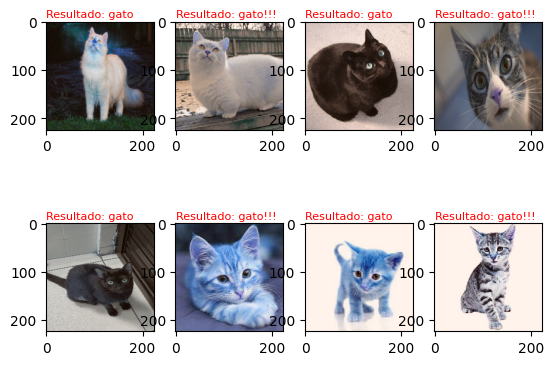

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


def plot_cats():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]
    exatamente_gatos = 0
    lista_exatamente_gatos = []
    folder_path = './drive/MyDrive/1.COCADA/predictions/cats/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define nome do arquivo
        filename = folder_path + 'cat' + str(lista[i]) + '.jpg'

        # carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # converte os valores de cada pixel para o range de [0, 255], apenas para não distorcer a imagem
        img = img[0]
        img = (img - img.min()) * (255.0 / (img.max() - img.min()))
        img = img.astype('uint8')

        # redimensiona e converte para RGB
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # plota a imagem
        pyplot.imshow(img)

         # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] <= 0.3:
          label = "gato"
        elif result[0] >= 0.7:
          label = "cão"
        else:
          label = "inconclusivo"
        print(result[0])

        # realiza a contagem das imagens "perfeitamente gatos"
        if result[0] == 0:
          lista_exatamente_gatos.append(lista[i])
          label = "gato!!!"
          exatamente_gatos += 1

        # adiciona a legenda no plot
        # os parametros tem relação com a posição e a cor da legenda
        pyplot.text(0, -10, f'Resultado: {label}', color='red', fontsize=8)

    print(f"Com certeza gato: {exatamente_gatos}\nAproximadamente gato: {len(lista)-exatamente_gatos}")
    print()

    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos gatos e exibe o resultado da previsão
plot_cats()


Para fins de completude, segue o modelo do cachorro atualizado.<br>
Vale destacar que no código abaixo definimos arbitrariamente o range que designar o que é cão, o que é gato e o que é inconclusivo.<br>
```
if result[0] <= 0.3:
  label = "gato"
elif result[0] >= 0.7:
  label = "cão"
else:
  label = "inconclusivo"
  ```

1/1 [==============================] - 1s 1s/step
[1.]
1/1 [==============================] - 1s 1s/step
[1.]
1/1 [==============================] - 1s 654ms/step
[1.]
1/1 [==============================] - 1s 587ms/step
[1.]
1/1 [==============================] - 1s 563ms/step
[1.]
1/1 [==============================] - 1s 571ms/step
[0.99999994]
1/1 [==============================] - 1s 584ms/step
[0.7124911]
1/1 [==============================] - 1s 561ms/step
[1.]
Com certeza cão: 6
Aproximadamente cão: 2



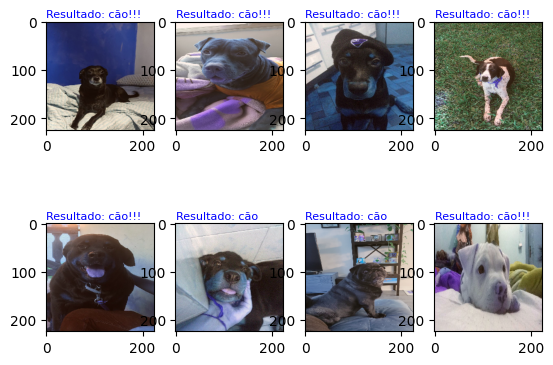

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


def plot_dogs():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]
    exatamente_caes = 0
    lista_exatamente_caes = []
    folder_path = './drive/MyDrive/1.COCADA/predictions/dogs/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define nome do arquivo
        filename = folder_path + 'dog' + str(lista[i]) + '.jpg'

        # carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # converte os valores de cada pixel para o range de [0, 255], apenas para não distorcer a imagem
        img = img[0]
        img = (img - img.min()) * (255.0 / (img.max() - img.min()))
        img = img.astype('uint8')

        # redimensiona e converte para RGB
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # plot image
        pyplot.imshow(img)

         # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] <= 0.3:
          label = "gato"
        elif result[0] >= 0.7:
          label = "cão"
        else:
          label = "inconclusivo"
        print(result[0])

        # realiza a contagem das imagens "perfeitamente cães"
        if result[0] == 1:
          lista_exatamente_caes.append(lista[i])
          label = "cão!!!"
          exatamente_caes += 1

        # adiciona a legenda no plot
        # os parametros tem relação com a posição e a cor da legenda
        pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)

    print(f"Com certeza cão: {exatamente_caes}\nAproximadamente cão: {len(lista)-exatamente_caes}")
    print()
    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_dogs()


# perda da seriedade
Apenas para motivos de menor relevancia, vamos selecionar algumas imagens aleatórias e tenta-las classificar como cão ou gato, dentre as imagens temos porquinhos da índia, uma bela moça e uns cachorros

1/1 [==============================] - 1s 709ms/step
[0.00120522]
1/1 [==============================] - 1s 591ms/step
[1.]
1/1 [==============================] - 1s 549ms/step
[0.92660797]
1/1 [==============================] - 1s 564ms/step
[7.676137e-30]
1/1 [==============================] - 1s 576ms/step
[0.9993813]
1/1 [==============================] - 1s 712ms/step
[0.00350838]
1/1 [==============================] - 1s 1s/step
[0.9999998]
1/1 [==============================] - 1s 1s/step
[0.43027234]



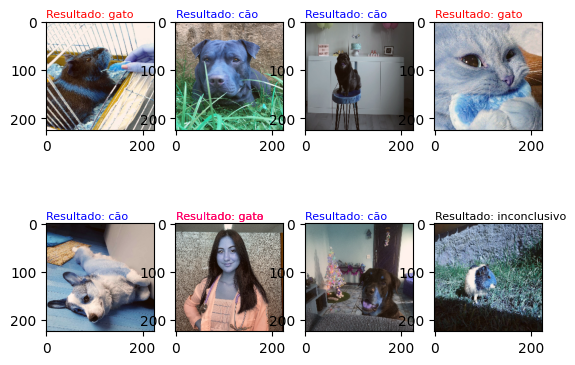

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


def plot_others():
    lista = [1, 2, 3, 4, 5, 6, 7, 8]

    folder_path = './drive/MyDrive/1.COCADA/predictions/others/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define filename
        filename = folder_path + 'other' + str(lista[i]) + '.jpg'

        # load image pixels
        img = load_image(filename)

        # predict the class
        result = model.predict(img)

        # converte os valores de cada pixel para o range de [0, 255], apenas para não distorcer a imagem
        img = img[0]
        img = (img - img.min()) * (255.0 / (img.max() - img.min()))
        img = img.astype('uint8')

        # redimensiona e converte para RGB
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # plot image
        pyplot.imshow(img)

         # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] <= 0.3:
          label = "gato"
          pyplot.text(0, -10, f'Resultado: {label}', color='red', fontsize=8)

          # muita arbitrariedade
          if filename == "./drive/MyDrive/1.COCADA/predictions/others/other6.jpg":
            label = "gata"
            #pyplot.text(0, -10, f'Resultado: {label}', color='pink', fontsize=8) # rosa pouco intenso
            pyplot.text(0, -10, f'Resultado: {label}', color=(1.0, 0.0, 0.5), fontsize=8) # define um rosa mais forte

        elif result[0] >= 0.7:
          label = "cão"
          # adiciona a legenda no plot
          # os parametros tem relação com a posição e a cor da legenda
          pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)
        else:
          # adiciona a legenda no plot
          # os parametros tem relação com a posição e a cor da legenda
          label = "inconclusivo"
          pyplot.text(0, -10, f'Resultado: {label}', color='black', fontsize=8)

        # printa o resultado para analisarmos a aproximação
        print(result[0])


    print()
    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_others()


# Extremamente arbitrário (ignore)

1/1 [==============================] - 1s 737ms/step
[0.1062949]



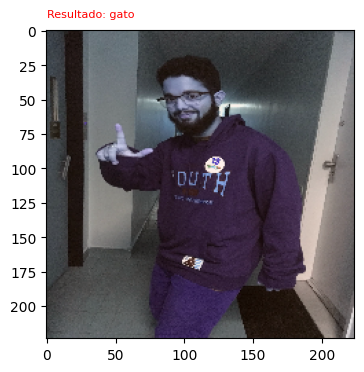

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


def plot_L():
    folder_path = './drive/MyDrive/1.COCADA/predictions/others/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')


    # define subplot
    pyplot.figure(figsize=(4, 4))

    # define filename
    filename = folder_path + 'jhayson' + '.jpg'

    # load image pixels
    img = load_image(filename)

    # predict the class
    result = model.predict(img)

    # converte os valores de cada pixel para o range de [0, 255], apenas para não distorcer a imagem
    img = img[0]
    img = (img - img.min()) * (255.0 / (img.max() - img.min()))
    img = img.astype('uint8')

    # redimensiona e converte para RGB
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # plota a imagem
    pyplot.imshow(img)

      # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
    if result[0] <= 0.3:
      label = "gato"
      pyplot.text(0, -10, f'Resultado: {label}', color='red', fontsize=8)



    elif result[0] >= 0.7:
      label = "cão"
      # adiciona a legenda no plot
      # os parametros tem relação com a posição e a cor da legenda
      pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)
    else:
      # adiciona a legenda no plot
      # os parametros tem relação com a posição e a cor da legenda
      label = "inconclusivo"
      pyplot.text(0, -10, f'Resultado: {label}', color='black', fontsize=8)

    # printa o resultado para analisarmos a aproximação
    print(result[0])







    print()
    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_L()


A célula abaixo analisa 1007 imagens de gatos, ou seja, o erro do nosso modelo será dada por:<br>E(count_inconclusivo, count_dogs) = count_inconclusivo + count_dogs<br><br>Cada imagem leva aproximadamente 1s para ser processada, como são 1007 imagens, o tempo de execução é aproximadamente 1007s ≅ 16.7min

In [ ]:
# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img




# apesar do nome, aqui não plotaremos as imagens, são 1007 imagens, começando por cat.1.jpg até cat.1007.jpg
def plot_cat_analysis():
    count_cats = 0
    count_inconclusivo = 0
    inconclusivo_list = []
    count_dogs = 0
    dogs_list = []
    inicio = 1
    fim = 1008
    folder_path = './drive/MyDrive/1.COCADA/predictions/cat_analysis/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(inicio, fim):
        # define nome do arquivo
        filename = folder_path + 'cat.' + str(i) + '.jpg'

        # carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] <= 0.3:
            count_cats += 1
        elif result[0] >= 0.7:
            count_dogs += 1
            dogs_list.append(i)
        else:
            count_inconclusivo += 1
            inconclusivo_list.append(i)

    print(f"Gatos: {count_cats}\nInconclusivo: {count_inconclusivo}\nCão {count_dogs}")
    print(f"Lista das imagens previstas erroneamente\nCão {dogs_list}\nInconclusivo {inconclusivo_list}")

# chama a função analisa as imagens dos gatos e exibe o resultado da previsão
plot_cat_analysis()


1/1 [==============================] - 0s 472ms/step
Gatos: 1006
Inconclusivo: 0
Cão 1
Lista das imagens previstas erroneamente
Cão [661]
Inconclusivo []


A célula abaixo analisa 1007 imagens de cachorros, ou seja, o erro do nosso modelo será dada por:<br>E(count_inconclusivo, count_cats) = count_inconclusivo + count_cats <br><br>Cada imagem leva aproximadamente 1s para ser processada, como são 1007 imagens, o tempo de execução é aproximadamente 1007s ≅ 16.7min

1/1 [==============================] - 1s 666ms/step
[0.90105784]



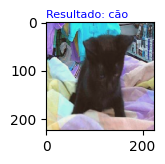

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


def plot_cat_analysis():
    lista = [661] # lista dos resultados errados, output da célula anterior

    folder_path = './drive/MyDrive/1.COCADA/predictions/cat_analysis/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define filename
        filename = folder_path + 'cat.' + str(lista[i]) + '.jpg'

        # load image pixels
        img = load_image(filename)

        # predict the class
        result = model.predict(img)

        # converte os valores de cada pixel para o range de [0, 255], apenas para não distorcer a imagem
        img = img[0]
        img = (img - img.min()) * (255.0 / (img.max() - img.min()))
        img = img.astype('uint8')

        # redimensiona e converte para RGB
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # plot image
        pyplot.imshow(img)

         # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] <= 0.3:
          label = "gato"
          pyplot.text(0, -10, f'Resultado: {label}', color='red', fontsize=8)

        elif result[0] >= 0.7:
          label = "cão"
          # adiciona a legenda no plot
          # os parametros tem relação com a posição e a cor da legenda
          pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)
        else:
          # adiciona a legenda no plot
          # os parametros tem relação com a posição e a cor da legenda
          label = "inconclusivo"
          pyplot.text(0, -10, f'Resultado: {label}', color='black', fontsize=8)

        # printa o resultado para analisarmos a aproximação
        print(result[0])


    print()
    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_cat_analysis()



In [ ]:
# apesar do nome, aqui não plotaremos as imagens, são 1007 imagens, começando por dog.1.jpg até dog.1007.jpg
def plot_dog_analysis():
    count_cats = 0
    cats_list = []
    count_inconclusivo = 0
    inconclusivo_list = []
    count_dogs = 0
    inicio = 1
    fim = 1008
    folder_path = './drive/MyDrive/1.COCADA/predictions/dog_analysis/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(inicio, fim):
        # define nome do arquivo
        filename = folder_path + 'dog.' + str(i) + '.jpg'

        # carrega a imagem e prepara-a de acordo com o tamanho necessário ao nosso modelo neural
        img = load_image(filename)

        # faz a previsão da classe (gato = 0, cachorro = 1)
        result = model.predict(img)

        # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] <= 0.3:
            count_cats += 1
            cats_list.append(i)
        elif result[0] >= 0.7:
            count_dogs += 1
        else:
            count_inconclusivo += 1
            inconclusivo_list.append(i)

    print(f"Gatos: {count_cats}\nInconclusivo: {count_inconclusivo}\nCão {count_dogs}")
    print(f"Lista das imagens previstas erroneamente\nGatos {cats_list}\nInconclusivo {inconclusivo_list}")

# chama a função analisa as imagens dos gatos e exibe o resultado da previsão
plot_dog_analysis()


1/1 [==============================] - 0s 486ms/step
Gatos: 4
Inconclusivo: 1
Cão 1002
Lista das imagens previstas erroneamente
Gatos [595, 919, 976, 1007]
Inconclusivo [356]


1/1 [==============================] - 1s 715ms/step
[0.48079157]
1/1 [==============================] - 0s 500ms/step
[0.01328165]
1/1 [==============================] - 0s 488ms/step
[0.00545113]
1/1 [==============================] - 0s 485ms/step
[0.08095711]
1/1 [==============================] - 0s 495ms/step
[0.25896943]



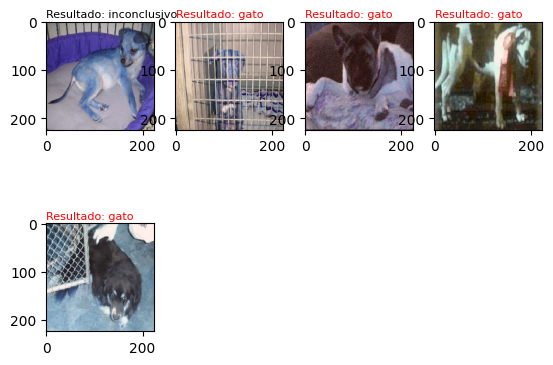

In [ ]:
from matplotlib import pyplot
import cv2
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# função responsavel por "modelar" a imagem de acordo com as exigencias do nosso modelo neural
def load_image(filename):
    # carrega a imagem e redimensiona
    img = load_img(filename, target_size=(224, 224))

    # converte a imagem para array
    img = img_to_array(img)

    # redimensiona a imagem numa única imagem com 3 canais
    img = img.reshape(1, 224, 224, 3)

    # normalização dos dados
    img = img.astype('float32') # converte os elementos do array da imagem para a tipagem utilizada pelo nosso modelo
    img = img - [123.68, 116.779, 103.939]
    return img


def plot_dog_analysis():
    lista = [356, 595, 919, 976, 1007] # lista dos resultados errados, output da célula anterior

    folder_path = './drive/MyDrive/1.COCADA/predictions/dog_analysis/'

    # carrega o modelo
    model = load_model('./drive/MyDrive/1.COCADA/best_model.h5')

    # loop responsável por varrer todas as imagens do diretório, temos 8 imagens
    for i in range(len(lista)):
        # define subplot
        pyplot.subplot(240 + 1 + i)

        # define filename
        filename = folder_path + 'dog.' + str(lista[i]) + '.jpg'

        # load image pixels
        img = load_image(filename)

        # predict the class
        result = model.predict(img)

        # converte os valores de cada pixel para o range de [0, 255], apenas para não distorcer a imagem
        img = img[0]
        img = (img - img.min()) * (255.0 / (img.max() - img.min()))
        img = img.astype('uint8')

        # redimensiona e converte para RGB
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # plot image
        pyplot.imshow(img)

         # atribui ao label o resultado da previsão (útil para mostrar a previsão nas imagens plotadas)
        if result[0] <= 0.3:
          label = "gato"
          pyplot.text(0, -10, f'Resultado: {label}', color='red', fontsize=8)

        elif result[0] >= 0.7:
          label = "cão"
          # adiciona a legenda no plot
          # os parametros tem relação com a posição e a cor da legenda
          pyplot.text(0, -10, f'Resultado: {label}', color='blue', fontsize=8)
        else:
          # adiciona a legenda no plot
          # os parametros tem relação com a posição e a cor da legenda
          label = "inconclusivo"
          pyplot.text(0, -10, f'Resultado: {label}', color='black', fontsize=8)

        # printa o resultado para analisarmos a aproximação
        print(result[0])


    print()
    # exibe as imagens
    pyplot.show()


# chama a função que plota as imagens dos cachorros e exibe o resultado da previsão
plot_dog_analysis()

